# Querying butler WEP outputs

Owner: **Guillem Megias** ([@gmegh](https://github.com/lsst-ts/ts_aos_analysis/issues/new?body=@gmegh)) 

Last Verified to Run: **2024-08-22**

Software Versions:
* lsst_distrib: **w_2024_32**

Requirements:
* [summit_utils](https://github.com/lsst-sitcom/summit_utils)


## Notebook Objective
The goal of this notebook is to show the user how to query and access basic Wavefront Estimation Pipeline (WEP) outputs from the butler. 

## Logistics
This notebook can be run from USDF or the Summit. The current version uses some collections present in the summit butler, if they have been wiped by the time you run this notebook, you will have to use a different collection and/or the butler in USDF. 

If running from USDF the following butler and collections are recommended as an example:
* collection: 'sitcomtn-135/directDetectTimingTest_SourceLimit5'
* butler: '/sdf/data/rubin/repo/aos_imsim'

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
from lsst.daf.butler import Butler
from lsst.ip.isr import IsrTask, IsrTaskConfig
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from lsst.summit.utils.plotting import plot
%matplotlib inline

## Setting up the butler and collections from mtaos runs

In [2]:
# collections = ['mtaos_wep_Script:102889_20240502T042949505']
collections = ['sitcomtn-135/directDetectTimingTest_SourceLimit5']

# butler = Butler('/repo/LSSTComCam', collections=collections)
# butler = Butler('/sdf/data/rubin/repo/aos_imsim', collections=collections)
butler = Butler('/repo/embargo')
registry = butler.registry

In [4]:
# registry.queryCollections()

## Get PostISR and plot exposure

In [3]:
postisr = list(registry.queryDatasets('postISRCCD', collections=collections, detector = 0))
exposure_ids = np.array([data.dataId['exposure'] for data in postisr])
exposure = butler.get(postisr[0])

In [12]:
postisr[0]

DatasetRef(DatasetType('postISRCCD', {band, instrument, day_obs, detector, group, physical_filter, exposure}, Exposure), {instrument: 'LSSTComCamSim', detector: 0, exposure: 7024072600012, band: 'r', day_obs: 20240726, group: '7024072600010', physical_filter: 'r_03'}, run='sitcomtn-135/directDetectTimingTest_SourceLimit5/20240725T184035Z', id=7b658934-a178-4744-83e1-4abdd805b732)

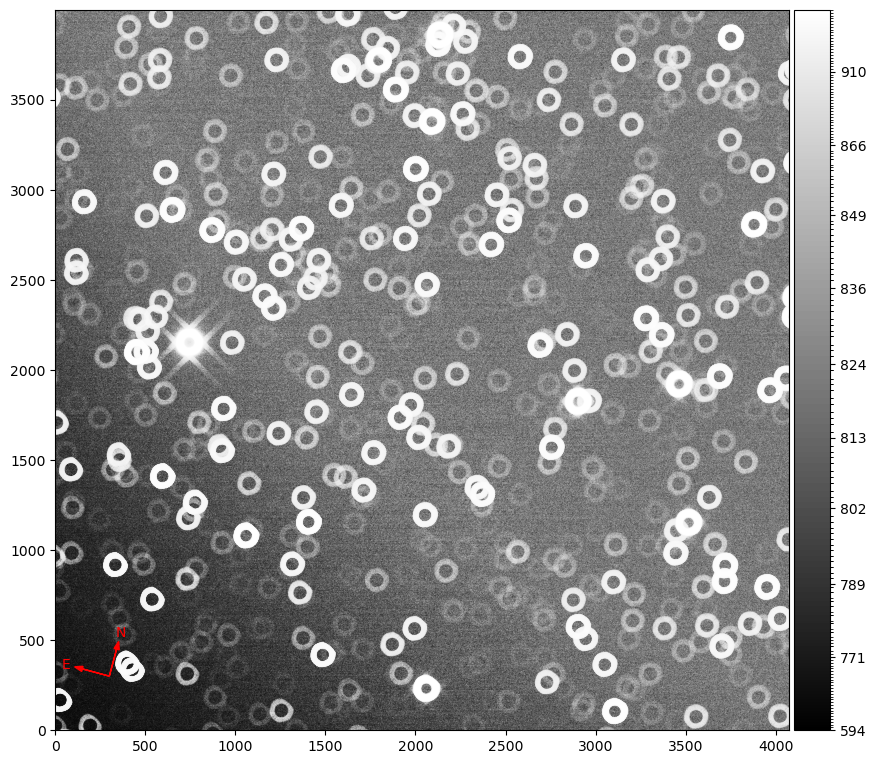

In [4]:
fig = plt.figure(figsize=(10, 10))
_ = plot(exposure, figure=fig, stretch='ccs')

### Plot intra focal postISRCCDs for each detector

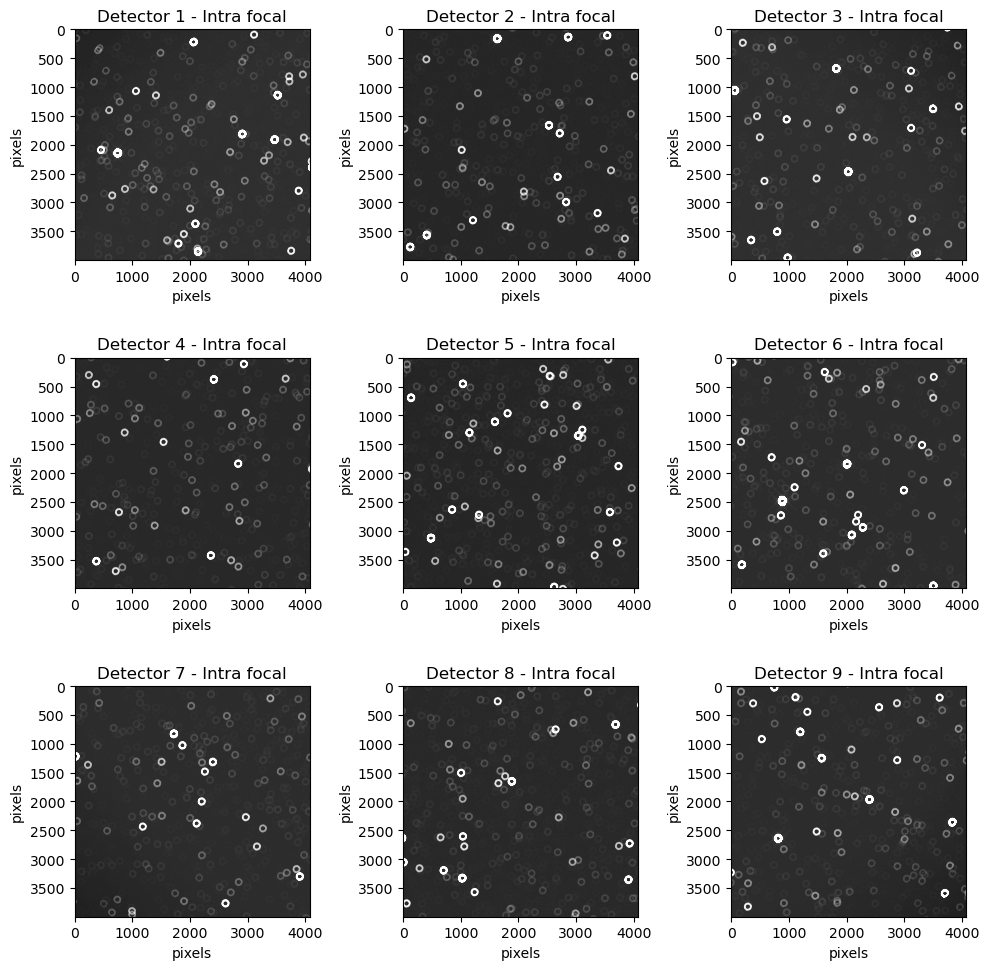

In [5]:
plt.figure(figsize = (10, 10))
for selected_detector in range(9):
    plt.subplot(3,3, selected_detector + 1)
    list_of_postisrs = list(registry.queryDatasets('postISRCCD', collections=collections, detector = selected_detector, exposure = np.min(exposure_ids)))
    plt.imshow(butler.get(list_of_postisrs[0]).image.array, norm=LogNorm(vmax = 3e3), cmap = 'gray')
    plt.title(f'Detector {selected_detector + 1} - Intra focal')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

plt.tight_layout()


### Plot extra focal postISRCCDs for each detector

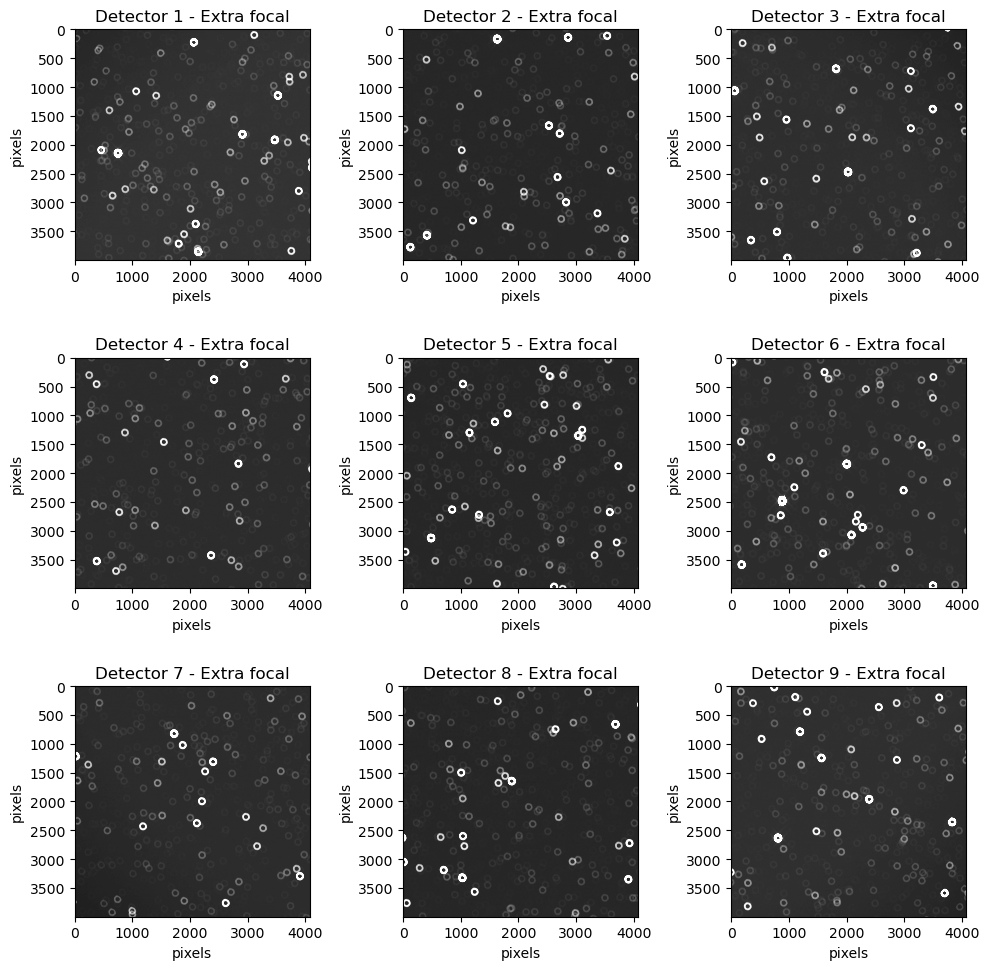

In [6]:
plt.figure(figsize = (10, 10))
for selected_detector in range(9):
    plt.subplot(3,3, selected_detector + 1)
    list_of_postisrs = list(registry.queryDatasets('postISRCCD', collections=collections, detector = selected_detector, exposure = np.max(exposure_ids)))
    plt.imshow(butler.get(list_of_postisrs[0]).image.array, norm=LogNorm(vmax = 3e3), cmap = 'gray')
    plt.title(f'Detector {selected_detector + 1} - Extra focal')
    plt.xlabel('pixels')
    plt.ylabel('pixels')

plt.tight_layout()

## Donut Stamps

### Donut stamps object

In [7]:
selected_detector = 2
list_stamps_cutout = list(registry.queryDatasets("donutStampsIntra", collections=collections, detector = selected_detector))
list_of_stamps = butler.get(list_stamps_cutout[0])

# print what's inside of a donut stamp
print(list_of_stamps[0])

DonutStamp(stamp_im=lsst.afw.image._maskedImage.MaskedImageF=(image=[[ -43.834045     87.84601       6.809082   ...   39.267212
    -4.494629     10.650696  ]
 [ -37.588745      1.2386475   -52.78662    ...  -21.492676
    10.483215    -18.131104  ]
 [  32.978027     31.287964      0.8979492  ...   -7.0198364
   -54.147766      4.75708   ]
 ...
 [  11.739624     16.802185    -23.717407   ...  -18.137756
   -19.823425     -9.727661  ]
 [  51.412415     -0.92474365   44.655334   ...  -12.808838
    19.166626     44.409912  ]
 [-103.905334     85.17438      15.954834   ...  -28.518372
    53.948975     -6.643799  ]],
mask=[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], maskPlaneDict={'BAD': 0, 'CR': 3, 'DETECTED': 5, 'DETECTED_NEGATIVE': 6, 'EDGE': 4, 'INTRP': 2, 'NO_DATA': 8, 'SAT': 1, 'SUSPECT': 7}
variance=[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0.

### Intra focal stamps

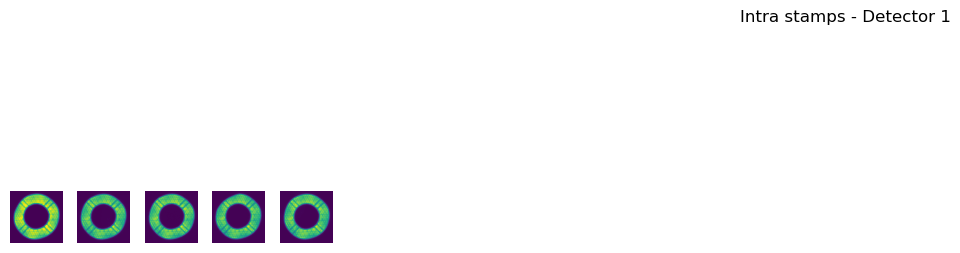

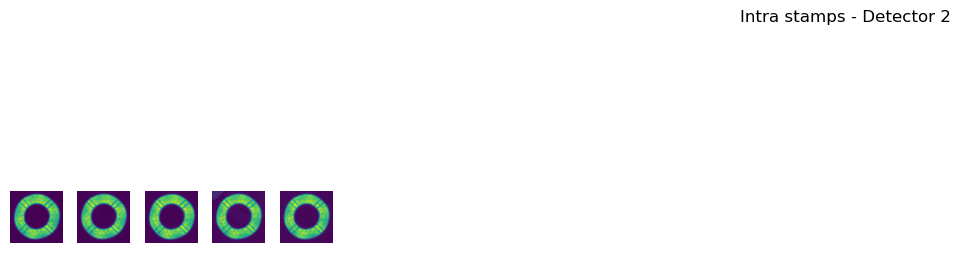

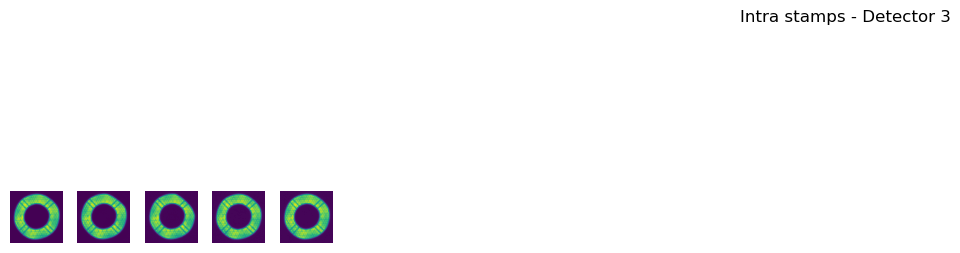

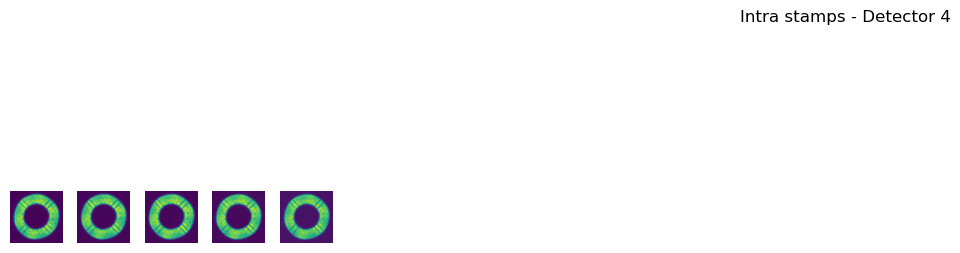

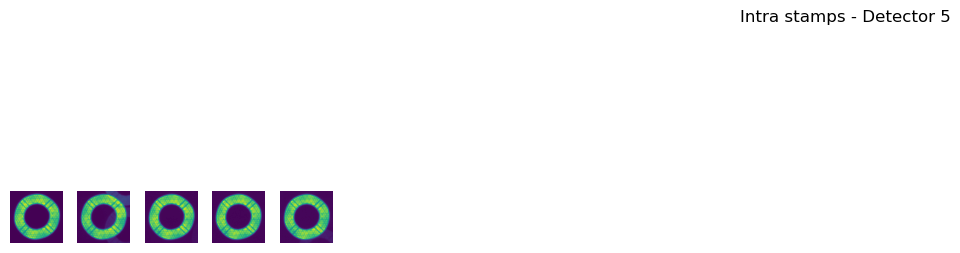

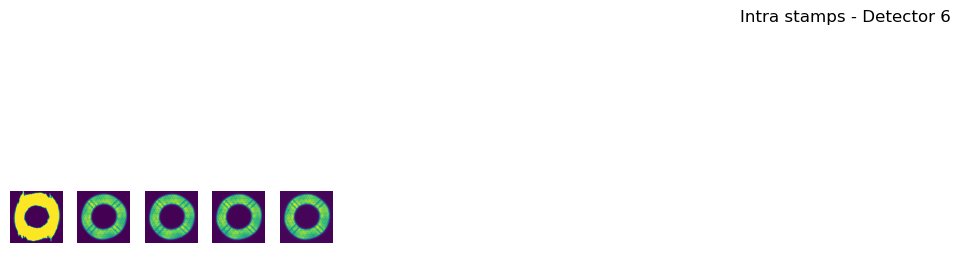

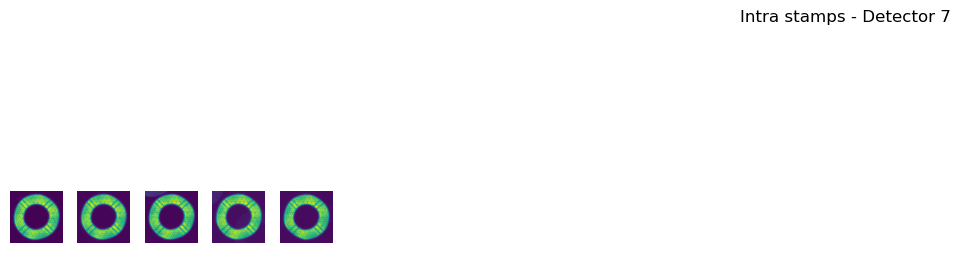

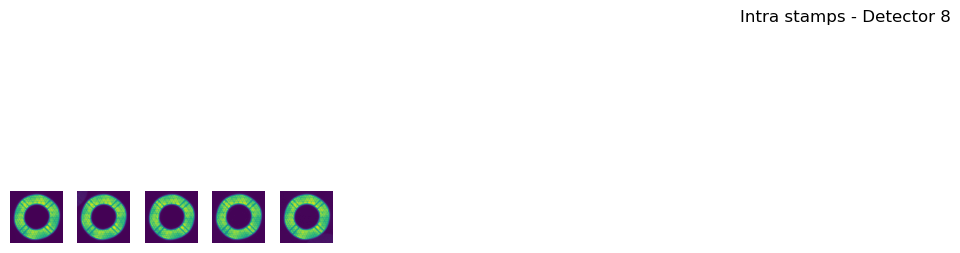

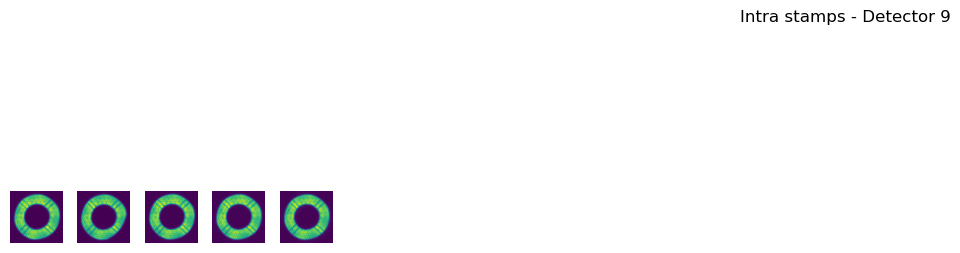

In [8]:
for selected_detector in range(9):
    list_stamps_cutout = list(registry.queryDatasets("donutStampsIntra", collections=collections, detector = selected_detector))
    list_of_stamps = butler.get(list_stamps_cutout[0])
    total_stamps = len(list_of_stamps)
    
    plt.figure(figsize = (17,4))
    for idx in range(total_stamps):
        plt.subplot((total_stamps // 25) + 1, 25, idx + 1)
        plt.imshow(list_of_stamps[idx].stamp_im.image.array)
        plt.axis('off') 
    
    plt.suptitle(f"Intra stamps - Detector {selected_detector + 1}")
    plt.tight_layout()

### Extra focal stamps

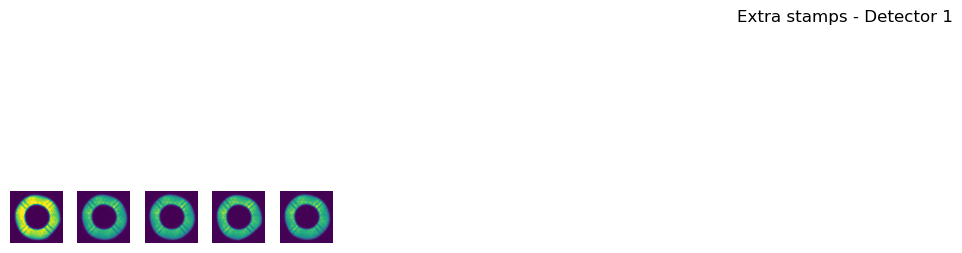

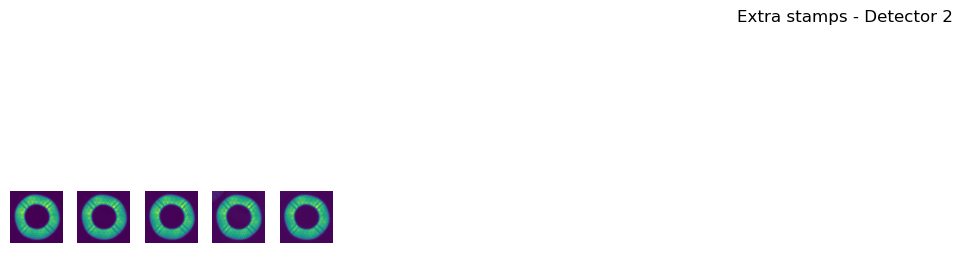

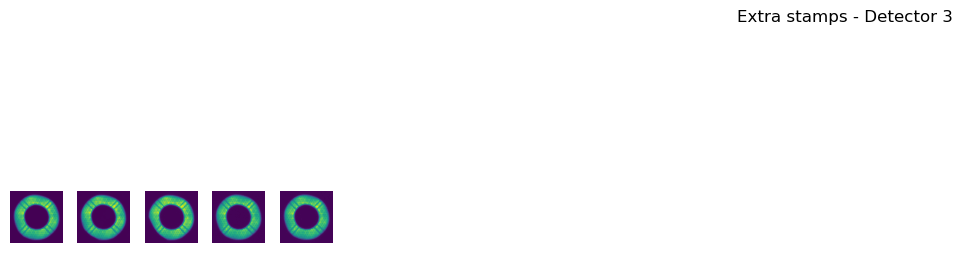

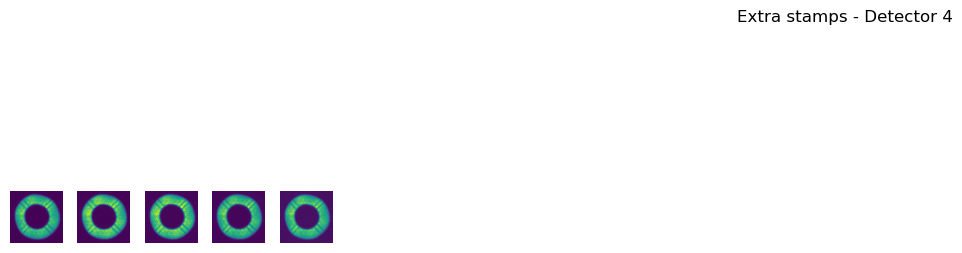

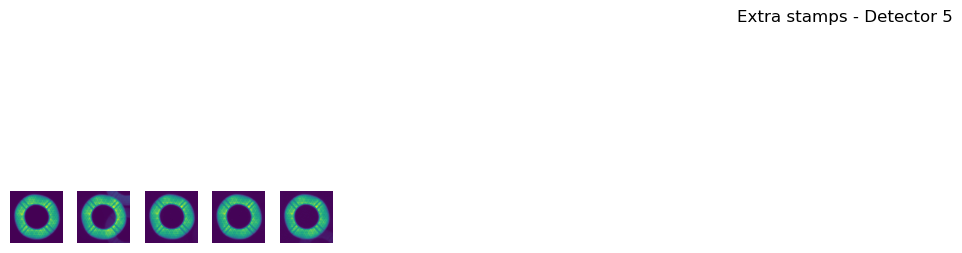

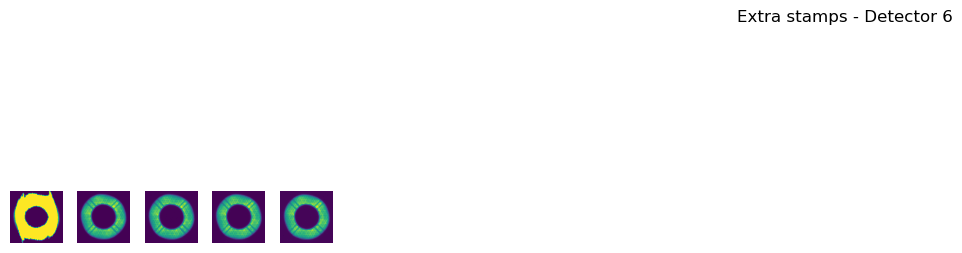

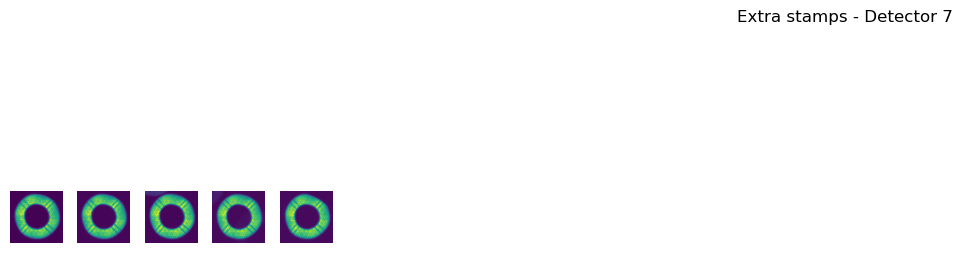

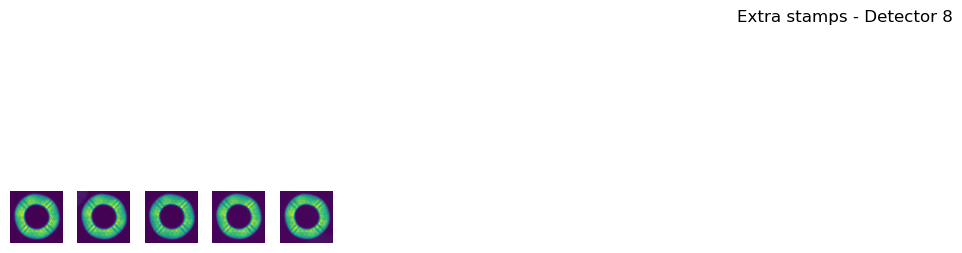

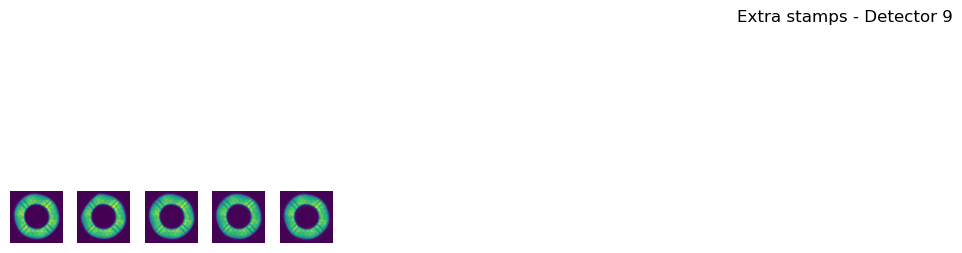

In [9]:
for selected_detector in range(9):
    list_stamps_cutout = list(registry.queryDatasets("donutStampsExtra", collections=collections, detector = selected_detector))
    list_of_stamps = butler.get(list_stamps_cutout[0])
    total_stamps = len(list_of_stamps)
    
    plt.figure(figsize = (17,4))
    for idx in range(total_stamps):
        plt.subplot((total_stamps // 25) + 1, 25, idx + 1)
        plt.imshow(list_of_stamps[idx].stamp_im.image.array)
        plt.axis('off') 
    
    plt.suptitle(f"Extra stamps - Detector {selected_detector + 1}")
    plt.tight_layout()

## Zernike estimates from WEP


ValueError: could not broadcast input array from shape (25,) into shape (19,)

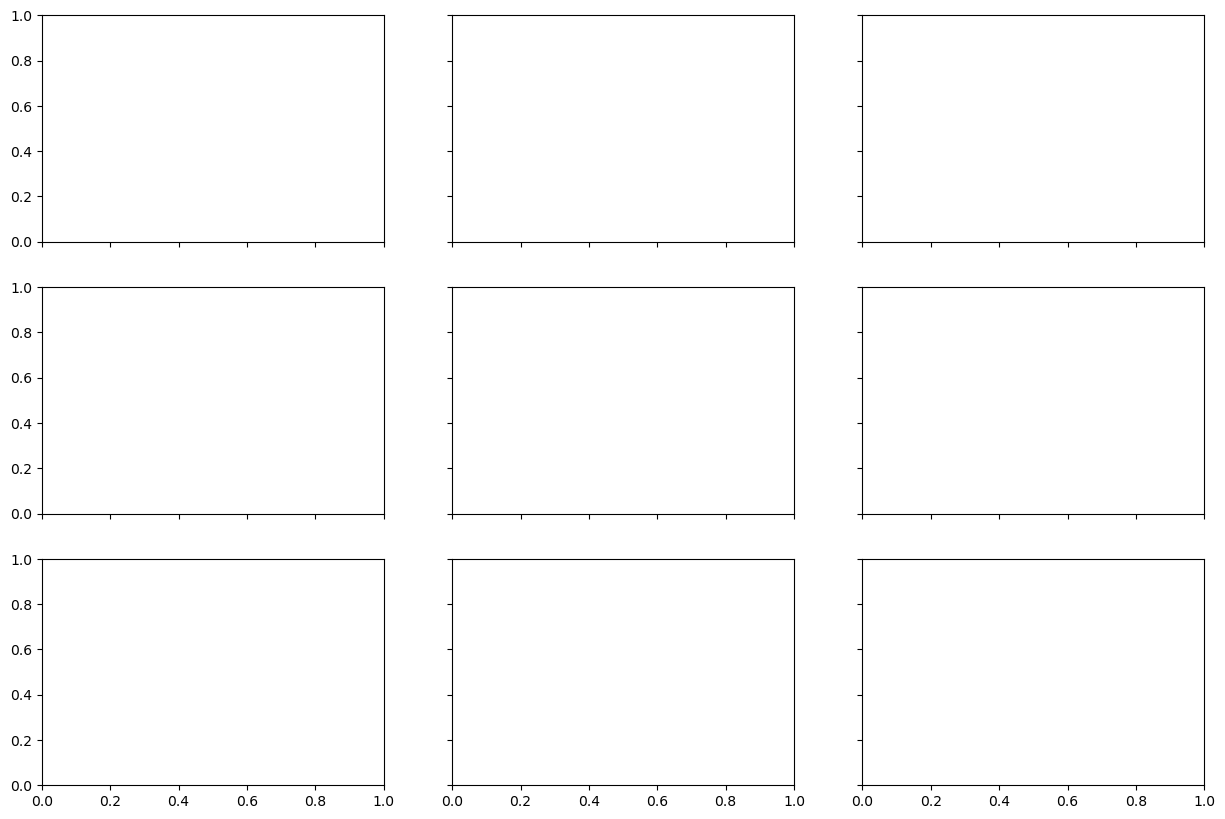

In [10]:
detectors_label = ['R22_S00', 'R22_S01', 'R22_S02', 'R22_S10', 'R22_S11', 'R22_S12', 'R22_S20', 'R22_S21', 'R22_S22']     

# Create a figure and subplots with shared x and y axes
fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
zk_avg = np.zeros((6,9,19))
for detector, ax in enumerate(axs.flatten()):
    list_of_collection_estimates = list(registry.queryDatasets('zernikeEstimateAvg', detector = detector))
    for idx, element in enumerate(list_of_collection_estimates):
        data = butler.get(element)  # Assuming this returns the data to be plotted
        zk_avg[idx, detector, :] = data
        ax.plot(data, '.', label=element.run)
        
    ax.set_title(f'Detector {detector + 1} - {detectors_label[detector]} ')

    # Label only the bottom row and the leftmost column
    if detector % 3 == 0:  # First column
        ax.set_ylabel('um')
    if detector >= 6:  # Bottom row
        ax.set_xlabel('Zernike Noll Index')
        

plt.tight_layout()
plt.show()